In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import sys
sys.path.append('../src')
from features.Pipeline import Pipeline

import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

In [57]:
wave_pipe = Pipeline("waveform")
stft_pipe = Pipeline("stft")
mel_pipe = Pipeline("mel")
mfcc_pipe = Pipeline("mfcc")
cqt_pipe = Pipeline("cqt")

# file_path = '../data/raw/NSynth/audio/bass_synthetic_068-022-075.wav'
file_path = '../data/raw/Single-bass/bass_electronic_018-026-127.wav'

wave_spectro = wave_pipe.process(file_path)
stft_spectro = stft_pipe.process(file_path)
# stft_spectro = stft_spectro[1:, :]
mel_spectro = mel_pipe.process(file_path)
mfcc_spectro = mfcc_pipe.process(file_path)
cqt_spectro = cqt_pipe.process(file_path)

In [58]:
print(f'WAVE transformation result shape: {wave_spectro.shape}')
print(f'STFT transformation result shape: {stft_spectro.shape}')
print(f'MEL transformation result shape: {mel_spectro.shape}')
print(f'MFCC transformation result shape: {mfcc_spectro.shape}')
print(f'CQT transformation result shape: {cqt_spectro.shape}')

WAVE transformation result shape: torch.Size([88200])
STFT transformation result shape: torch.Size([512, 173])
MEL transformation result shape: torch.Size([256, 173])
MFCC transformation result shape: torch.Size([20, 173])
CQT transformation result shape: torch.Size([84, 173])


In [59]:
def draw_spectro(spectro, name="Mel-Spectrogram (dB)"):
    mel_spectro = np.abs(spectro)
    power_to_db = librosa.power_to_db(mel_spectro, ref=np.max)
    plt.figure(figsize=(8, 7))
    librosa.display.specshow(power_to_db, sr=22050, x_axis='time', y_axis='mel', cmap='magma', 
    hop_length=512)
    plt.colorbar(label='dB')
    plt.title(name, fontdict=dict(size=18))
    plt.xlabel('Time', fontdict=dict(size=15))
    plt.ylabel('Frequency', fontdict=dict(size=15))
    plt.show()

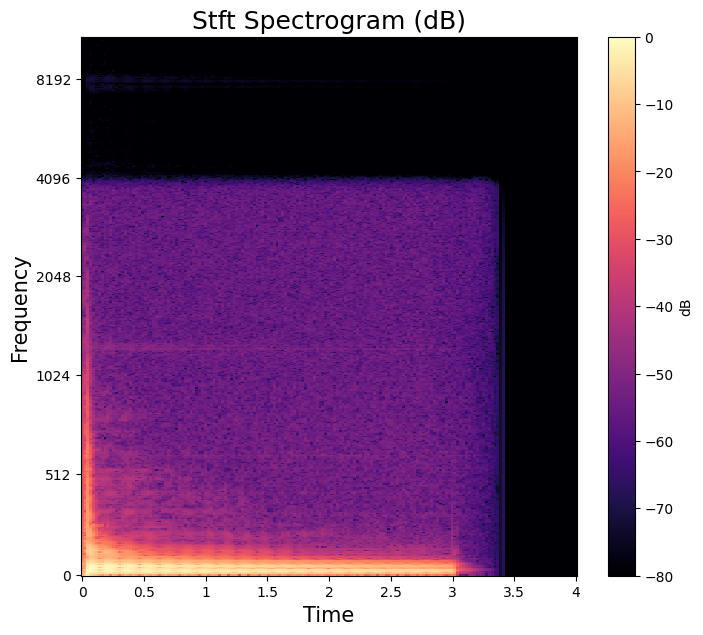

In [60]:
# draw_spectro(wave_spectro)
draw_spectro(stft_spectro, name="Stft Spectrogram (dB)")
# draw_spectro(mel_spectro, name="Mel Spectrogram (dB)")
# draw_spectro(mfcc_spectro, name="Mfcc Spectrogram (dB)")
# draw_spectro(cqt_spectro, name="Cqt Spectrogram (dB)")

In [61]:
wave_audio_back = wave_pipe.post_process(wave_spectro)
stft_audio_back = stft_pipe.post_process(stft_spectro)
mel_audio_back = mel_pipe.post_process(mel_spectro)
mfcc_audio_back = mfcc_pipe.post_process(mfcc_spectro)
cqt_audio_back = cqt_pipe.post_process(cqt_spectro)

ParameterError: Target size (1022) must be at least input size (1024)

In [23]:
print(wave_audio_back.shape)
print(stft_audio_back.shape)
print(mel_audio_back.shape)
print(mfcc_audio_back.shape)
print(cqt_audio_back.shape)

(88200,)
(88064,)
(88064,)
(88064,)
(88064,)


In [24]:
print(wave_audio_back)
print(stft_audio_back)
print(mel_audio_back)
print(mfcc_audio_back)
# print(cqt_audio_back)

[ 1.6728541e-07  1.0834093e-07 -3.1700159e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[ 1.67488025e-07  1.08537975e-07 -3.16814265e-07 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
[-0.01192542 -0.01707657 -0.01935141 ...  0.          0.
  0.        ]
[ 3.8240110e-03 -8.6180994e-04  4.8989388e-03 ...  3.3832231e-04
  1.9900683e-04  5.8538844e-05]
[ 3.53480835e-02  3.49979004e-02  3.58077981e-02 ... -1.39285414e-09
 -1.73794057e-09 -2.04746959e-09]


In [25]:
# sf.write('wave_process.wav', data=wave_audio_back, samplerate=wave_pipe.input_sr, subtype='PCM_24')
# sf.write('stft_process.wav', data=stft_audio_back, samplerate=stft_pipe.input_sr, subtype='PCM_24')
sf.write('mel_process.wav', data=mel_audio_back, samplerate=mel_pipe.input_sr, subtype='PCM_24')
# sf.write('mfcc_process.wav', data=mfcc_audio_back, samplerate=mfcc_pipe.input_sr, subtype='PCM_24')
# sf.write('cqt_process.wav', data=cqt_audio_back, samplerate=cqt_pipe.input_sr, subtype='PCM_24')